In [1]:
import echopype as ep
from dask.distributed import Client
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings

In [2]:
ep.__version__

'0.8.2.dev10+g0bc534e'

In [3]:
# Read the content of the transect subgroup text file
with open("x0008_1_wt_20130617_191304_f0031.txt", 'r') as file:
    raw_filenames = [line.strip() for line in file.readlines()]

raw_filenames

['SaKe_2013-D20130617-T191304.raw',
 'SaKe_2013-D20130617-T191416.raw',
 'SaKe_2013-D20130617-T192058.raw',
 'SaKe_2013-D20130617-T192917.raw',
 'SaKe_2013-D20130617-T193651.raw',
 'SaKe_2013-D20130617-T194321.raw',
 'SaKe_2013-D20130617-T194949.raw',
 'SaKe_2013-D20130617-T195603.raw',
 'SaKe_2013-D20130617-T200201.raw',
 'SaKe_2013-D20130617-T201010.raw',
 'SaKe_2013-D20130617-T202041.raw',
 'SaKe_2013-D20130617-T203058.raw',
 'SaKe_2013-D20130617-T203940.raw',
 'SaKe_2013-D20130617-T204614.raw',
 'SaKe_2013-D20130617-T205224.raw',
 'SaKe_2013-D20130617-T205822.raw',
 'SaKe_2013-D20130617-T210424.raw',
 'SaKe_2013-D20130617-T211324.raw',
 'SaKe_2013-D20130617-T212153.raw',
 'SaKe_2013-D20130617-T213038.raw',
 'SaKe_2013-D20130617-T213932.raw',
 'SaKe_2013-D20130617-T214804.raw',
 'SaKe_2013-D20130617-T215618.raw',
 'SaKe_2013-D20130617-T220322.raw',
 'SaKe_2013-D20130617-T221035.raw',
 'SaKe_2013-D20130617-T221712.raw',
 'SaKe_2013-D20130617-T222333.raw',
 'SaKe_2013-D20130617-T22314

In [9]:
# Suppress warning:
#/home/ec2-user/mambaforge/envs/hake_regridding_visualization_2023_10_10/lib/python3.9/site-packages/echopype/utils/coding.py:87: UserWarning: Times can't be serialized faithfully to int64 with requested units 'seconds since 1900-01-01T00:00:00+00:00'. Resolution of 'microseconds' needed. Serializing times to floating point instead. Set encoding['dtype'] to integer dtype to serialize to int64. Set encoding['dtype'] to floating point dtype to silence this warning.
# encoded_data, _, _ = coding.times.encode_cf_datetime(
warnings.filterwarnings("ignore", category=UserWarning)

# Create echodata list
ed_list = []
for index, raw_filename in enumerate(raw_filenames):
    print(f"Currently on {index + 1}/{len(raw_filenames)}")
    ed = ep.open_raw(f"s3://ncei-wcsd-archive/data/raw/Bell_M._Shimada/SH1305/EK60/{raw_filename}",   
                     sonar_model="EK60",
                     storage_options={"anon": True},
                     use_swap=True)
    ed_list.append(ed)


Currently on 1/31
Currently on 2/31
Currently on 3/31
Currently on 4/31
Currently on 5/31
Currently on 6/31
Currently on 7/31
Currently on 8/31
Currently on 9/31
Currently on 10/31
Currently on 11/31
Currently on 12/31
Currently on 13/31
Currently on 14/31
Currently on 15/31
Currently on 16/31
Currently on 17/31
Currently on 18/31
Currently on 19/31
Currently on 20/31
Currently on 21/31
Currently on 22/31
Currently on 23/31
Currently on 24/31
Currently on 25/31
Currently on 26/31
Currently on 27/31
Currently on 28/31
Currently on 29/31
Currently on 30/31
Currently on 31/31


In [10]:
# Create combined echodata object
combined_ed = ep.combine_echodata(
    ed_list
)

In [11]:
combined_ed.to_zarr("combined_ed.zarr")

In [4]:
combined_ed = ep.open_converted("combined_ed.zarr")

In [5]:
combined_ed

<EchoData: standardized raw data from /home/ec2-user/hake_regridding_visualization/combined_ed.zarr>
Top-level: contains metadata about the SONAR-netCDF4 file format.
├── Environment: contains information relevant to acoustic propagation through water.
├── Platform: contains information about the platform on which the sonar is installed.
│   └── NMEA: contains information specific to the NMEA protocol.
├── Provenance: contains metadata about how the SONAR-netCDF4 version of the data were obtained.
├── Sonar: contains sonar system metadata and sonar beam groups.
│   └── Beam_group1: contains backscatter power (uncalibrated) and other beam or channel-specific data, including split-beam angle data when they exist.
└── Vendor_specific: contains vendor-specific information about the sonar and the data.

In [6]:
# Compute Sv
combined_ds_Sv = ep.calibrate.compute_Sv(combined_ed)

In [19]:
# Add Location
combined_ds_Sv = ep.consolidate.add_location(combined_ds_Sv, combined_ed)

In [7]:
combined_ds_Sv

<xarray.Dataset>
Dimensions:                        (channel: 5, ping_time: 9925,
                                    range_sample: 3957, filenames: 1)
Coordinates:
  * channel                        (channel) <U37 'GPT  18 kHz 009072058c8d 3...
  * ping_time                      (ping_time) datetime64[ns] 2013-06-17T19:1...
  * range_sample                   (range_sample) int64 0 1 2 ... 3954 3955 3956
  * filenames                      (filenames) int64 0
Data variables: (12/16)
    Sv                             (channel, ping_time, range_sample) float64 ...
    echo_range                     (channel, ping_time, range_sample) float64 ...
    frequency_nominal              (channel) float64 ...
    sound_speed                    (channel, ping_time) float64 1.481e+03 ......
    sound_absorption               (channel, ping_time) float64 0.002822 ... ...
    sa_correction                  (ping_time, channel) float64 -0.72 ... -0.17
    ...                             ...
    angle_sensitivity_alongship    (channel) float64 ...
    angle_sensitivity_athwartship  (channel) float64 ...
    beamwidth_alongship            (channel) float64 ...
    beamwidth_athwartship          (channel) float64 ...
    source_filenames               (filenames) <U61 '/home/ec2-user/hake_regr...
    water_level                    float64 ...
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.8.2.dev10+g0bc534e
    processing_time:              2023-10-10T18:43:22Z
    processing_function:          calibrate.compute_Sv

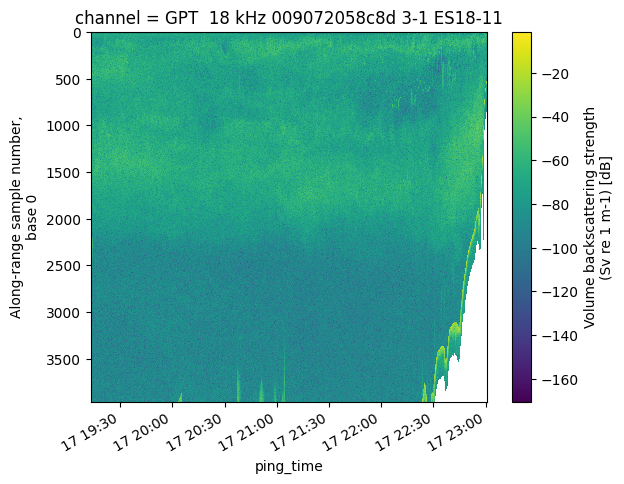

In [8]:
combined_ds_Sv.Sv.isel(channel=0).plot(y="range_sample", yincrease=False)

In [9]:
# Setup dask client
#client = Client(n_workers=4)
#client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 32,Total memory: 62.09 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45249,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 62.09 GiB
Comm: tcp://127.0.0.1:33681,Total threads: 8
Dashboard: http://127.0.0.1:45979/status,Memory: 15.52 GiB
Nanny: tcp://127.0.0.1:35899,


In [22]:
def plot_tricolor(combined_ds_Sv, figname):
    def convert_to_color(ds_Sv, chan_sel, th_bottom, th_top):
            da_color = ds_Sv.isel(channel=chan_sel)
            da_color = da_color.where(da_color <= th_top, other=th_top)  # set to ceiling at the top
            da_color = da_color.where(da_color >= th_bottom)  # threshold at the bottom
            da_color = da_color.expand_dims('frequency')
            # da_color = ((da_color - th_bottom) / (th_top - th_bottom) *255).astype('int')  # this would produce false extreme values from float NaNs
            da_color = (da_color - th_bottom) / (th_top - th_bottom)
            return da_color

    # Set RGB Dictionary
    RGB_dict = {
        "freq_RGB": [3,1,0],
        "threshold_bottom_RGB": [-70, -70, -70],
        "threshold_top_RGB": [-34, -34, -34]
    }

    # create RGB mapping
    da_colors = []
    for band in range(3):
        da = convert_to_color(
        combined_ds_Sv.Sv, 
        chan_sel=RGB_dict["freq_RGB"][band], 
        th_bottom=RGB_dict["threshold_bottom_RGB"][band],
        th_top=RGB_dict["threshold_top_RGB"][band]
        )
        da_colors.append(da)

    # use combine_nested instead of merge to preserve the RGB frequency sequence
    try:
        tricolor = (
            xr.combine_nested(da_colors, concat_dim='frequency')
            .transpose('range_sample', 'ping_time', 'frequency')
        )
    except:
        tricolor = (
            xr.combine_nested(da_colors, concat_dim='frequency')
            .transpose('depth', 'ping_time', 'frequency')
        )
    tricolor = tricolor.where(np.logical_not(tricolor.isnull()), other=0)
    tricolor["ping_time"] = tricolor["ping_time"].astype('int')

    # Plot the data
    fig, ax = plt.subplots()

    # Plot tricolor echogram
    tricolor.plot.imshow(rgb="frequency", ax=ax, yincrease=False)

    # Get the x-axis tick unix times from the axis
    x_tick_unix_times = ax.get_xticks()

    # Convert Unix epoch time to datetime
    x_tick_labels = [pd.to_datetime(unix_time, unit="ns") for unix_time in x_tick_unix_times]

    # Set x-axis tick labels as datetime
    ax.set_xticklabels(x_tick_labels, rotation=45)

    # Set datetime xlabel
    plt.xlabel("Datetime")

    # Set Depth ylabel
    plt.ylabel("Depth (M)")

    # Set title text
    title = f"Tricolor Echogram for Non-Regridded Transect Subgroup x0008_1_wt_20130617_191304_f0031"

    # Create the plot and set the title text
    plt.title(title)

    # Save fig
    plt.savefig(figname, dpi=300)

/tmp/ipykernel_35879/1036659388.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels, rotation=45)


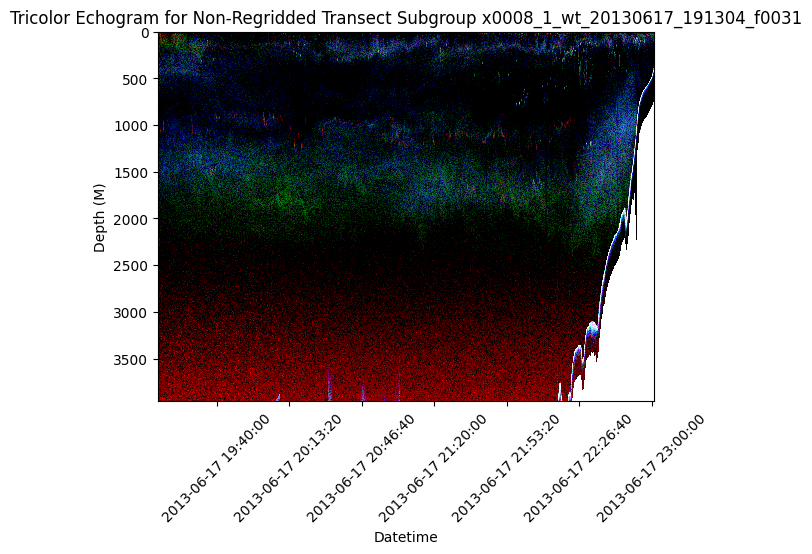

In [27]:
plot_tricolor(combined_ds_Sv, "non_regridded_tricolor.png")
# Running with chunks leads to weird chunk manager errors. Will need to investigate this more later.
#plot_tricolor(combined_ds_Sv.chunk("auto").persist())

In [15]:
# Regrid using Compute MVBS
WATER_LEVEL = 9.15
combined_ds_Sv.pipe(ep.consolidate.add_depth, depth_offset=WATER_LEVEL)
combined_ds_MVBS = ep.commongrid.compute_MVBS(
        combined_ds_Sv,
        range_bin="0.2m",  
        ping_time_bin="5s",
        range_var="depth"        
    )

/tmp/ipykernel_35879/1036659388.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_tick_labels, rotation=45)


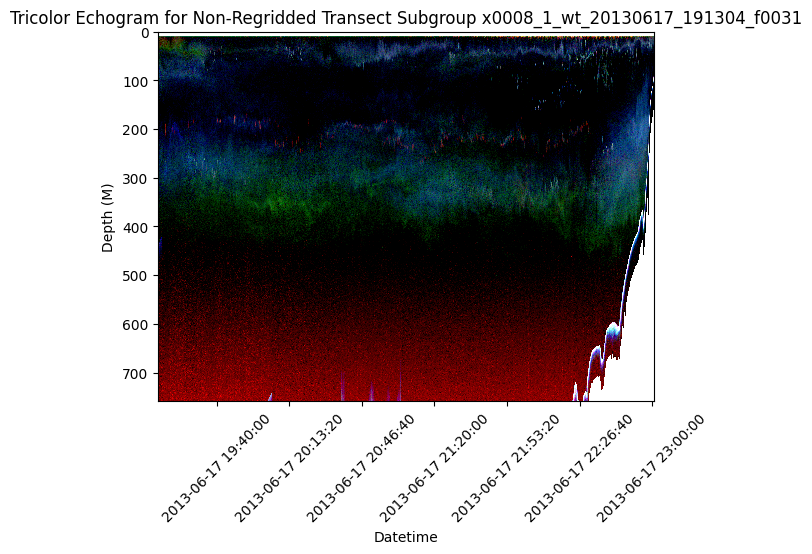

In [26]:
plot_tricolor(combined_ds_MVBS, "regridded_tricolor.png")